# Überprüfung der physikochemischen Merkmale von Peptidsequenzen
In diesem Notebook überprüfen wir die physikochemischen Merkmale von Peptidsequenzen, die mit der `peptides`-Bibliothek berechnet wurden. Wir visualisieren die berechneten Merkmale und analysieren ihre Verteilung, um sicherzustellen, dass die Berechnungen korrekt sind.


## Import der benötigten Bibliotheken

- `os`: Wird zur Verwaltung und Erstellung von Dateipfaden verwendet.
- `numpy`: Dient zur Arbeit mit numerischen Arrays, insbesondere zur Speicherung von physikochemischen Merkmalen.
- `Bio.SeqUtils.ProtParam`: Diese Bibliothek von Biopython wird zur Berechnung grundlegender Proteinparameter verwendet, wie Molekulargewicht, isoelektrischer Punkt und mehr.
- `peptides`: Wird verwendet, um spezialisierte physikochemische Merkmale von Peptiden zu berechnen, die dann in unserem Modell verwendet werden.


In [9]:
import os
import numpy as np
from Bio.SeqUtils.ProtParam import ProteinAnalysis
import peptides
import numpy as np

### Laden und Überprüfung der physikochemischen Daten

In diesem Abschnitt werden die physikochemischen Merkmale der Peptidsequenzen, die zuvor berechnet und gespeichert wurden, geladen und überprüft.

- **Basis-Pfad**: Die physikochemischen Merkmale wurden für die Epitope und die T-Zell-Rezeptor-Ketten (TRA und TRB) berechnet und unter einem bestimmten Basis-Pfad gespeichert (`~/BA/BA_ZHAW/data/physicoProperties/ssl_paired/allele`).
- **Dateien laden**: Wir haben drei `.npz`-Dateien:
  1. `Epitope_physico.npz` - enthält die Merkmale der Epitope.
  2. `TRA_CDR3_physico.npz` - enthält die Merkmale der Alpha-Kette (TRA) des T-Zell-Rezeptors.
  3. `TRB_CDR3_physico.npz` - enthält die Merkmale der Beta-Kette (TRB) des T-Zell-Rezeptors.
  
- **Verarbeitungsschritte**:
  - Die Dateien werden mit `numpy` (`np.load()`) geladen. Das `.npz`-Format ist ein komprimiertes NumPy-Format, das mehrere Arrays speichern kann.
  - Für jede Datei werden die ersten **fünf Sequenzen** und deren **physikochemische Merkmale** angezeigt, um sicherzustellen, dass die Daten korrekt geladen und interpretiert werden können.

- **Ziel**:
  - **Validierung**: Durch das Anzeigen der ersten Einträge können wir sicherstellen, dass die physikochemischen Merkmale richtig gespeichert und geladen wurden.
  - **Visualisierung**: Es bietet einen schnellen Überblick über die Art der berechneten Merkmale


In [2]:
# Pfade zu den physikochemischen Daten
base_path = "~/BA/BA_ZHAW/data/physicoProperties/ssl_paired/allele"
file_paths = [
    os.path.expanduser(f"{base_path}/Epitope_physico.npz"),
    os.path.expanduser(f"{base_path}/TRA_CDR3_physico.npz"),
    os.path.expanduser(f"{base_path}/TRB_CDR3_physico.npz"),
]

for file_path in file_paths:
    # Lade die Datei
    data = np.load(file_path)
    
    # Zeige einige der berechneten Werte an
    print(f"Datei: {file_path}")
    for key in list(data.keys())[:5]:  # Die ersten 5 Einträge zur Ansicht
        print(f"Sequenz: {key}")
        print(f"Physikochemische Merkmale: {data[key]}")
    print("\n" + "-"*50 + "\n")


Datei: /home/ubuntu/BA/BA_ZHAW/data/physicoProperties/ssl_paired/allele/Epitope_physico.npz
Sequenz: AVFDRKSDAK
Physikochemische Merkmale: [ 3.5472649e-01 -2.6465756e-01 -9.6220857e-01  4.0243840e-01
  6.4000003e-02 -3.2400000e-01  1.4600000e-01 -6.7650002e-01
  2.2669999e-01 -1.8140000e-01  4.3439999e-01 -9.6400000e-02
  1.2729999e-01 -2.5600001e-01 -1.6800000e-01 -2.3500000e-01
  4.9399999e-01 -1.8099999e-01 -6.0900003e-01 -2.5099999e-01
  2.4000000e-02  1.4900000e-01  2.5500000e-01 -3.5200000e-01
  1.0800000e-01 -2.8799999e-01  8.7499999e-02 -5.3399999e-02
 -1.0890000e-01 -8.0200002e-02 -3.1000001e-03 -4.1800001e-01
  1.8099999e-01 -1.8960000e+00  4.0300000e-01 -9.8000002e-01
  3.6800000e-01 -4.9999999e-03  1.5899999e-01 -1.1700000e-01
  7.2000003e-01  2.2120000e-01 -1.5200000e-02 -4.8300002e-02
 -8.5900001e-02 -8.4799999e-01 -1.6490000e-01 -2.3970000e-01
 -2.1400001e-02 -6.5800004e-02 -3.0720001e-01  2.1709999e-01
  4.4990000e-01  8.7140001e-02 -8.6571997e-01 -4.4101000e-01
  1.168

### Überprüfung der physikochemischen Merkmale mittels `peptides` und `Biopython`

In diesem Abschnitt werden die physikochemischen Merkmale einer Beispiel-Peptidsequenz (`CASSASQFAEAFF`) berechnet und überprüft. Es wird sichergestellt, dass die Berechnungen aus der Funktion `calculate_features.py` konsistent sind.

- **Berechnung mit `peptides`**:
  - Wir verwenden das `peptides`-Modul, um verschiedene physikochemische Merkmale der Peptidsequenz zu berechnen. Zu den berechneten Merkmalen gehören:
    - **Molekulargewicht**
    - **Isoelektrischer Punkt**
    - **Hydrophobizität** (Kyte-Doolittle-Skala)
    - **Instabilitätsindex**
    - **Aliphatischer Index**
    - **Boman-Index** (Protein-Bindungsfähigkeit)
    - **Lehninger-Ladung**
    - **Hydrophober Moment** (Alpha- und Beta-Winkel)

- **Berechnung mit `Biopython`**:
  - Um die Ergebnisse der `peptides`-Bibliothek zu überprüfen, werden die gleichen Merkmale, sofern möglich, auch mit `Biopython` berechnet.
  - `Biopython` kann die folgenden physikochemischen Merkmale berechnen:
    - **Molekulargewicht**
    - **Isoelektrischer Punkt**
    - **Hydrophobizität** (gravy = Grand Average of Hydropathy)
    - **Instabilitätsindex**

- **Vergleich der Ergebnisse**:
  - Die berechneten Werte der beiden Bibliotheken werden miteinander verglichen. Es wird überprüft, ob die Ergebnisse übereinstimmen oder zumindest sehr ähnlich sind.
  - Für einige Merkmale gibt es keine direkte Berechnung in `Biopython`, wie z. B. den **aliphatischen Index**, den **Boman-Index** oder den **hydrophoben Moment**. Für diese Eigenschaften wird nur der Wert von `peptides` ausgegeben.

- **Ziel der Überprüfung**:
  - Diese Überprüfung stellt sicher, dass die physikochemischen Berechnungen, die im `calculate_features.py`-Skript verwendet werden, korrekt sind.
  - Kleine Abweichungen zwischen den beiden Bibliotheken sind zu erwarten, besonders aufgrund unterschiedlicher Berechnungsmethoden oder verwendeter pK-Skalen.

Durch die Überprüfung der physikochemischen Merkmale mittels `peptides` und `Biopython` können wir sicherstellen, dass die Berechnungen korrekt und reproduzierbar sind. Diese konsistente Berechnung der physikochemischen Eigenschaften ist besonders wichtig, da sie später als Input für das Modelltraining verwendet werden sollen.


In [6]:
# Beispielsequenz zur Überprüfung
sequence = "CASSASQFAEAFF"

# Berechne die physikochemischen Merkmale mit deinem eigenen Modul `peptides`
sequence_Peptide_obj = peptides.Peptide(sequence)
calc_properties = {
    "molecular_weight": sequence_Peptide_obj.molecular_weight(average="expasy"),
    "isoelectric_point": sequence_Peptide_obj.isoelectric_point(pKscale="EMBOSS"),
    "hydrophobicity": sequence_Peptide_obj.hydrophobicity(scale="KyteDoolittle"),
    "instability_index": sequence_Peptide_obj.instability_index(),
    "aliphatic_index": sequence_Peptide_obj.aliphatic_index(),
    "boman_index": sequence_Peptide_obj.boman(),
    "lehninger_charge": sequence_Peptide_obj.charge(pKscale="Lehninger"),
    "hydrophobic_moment_alpha": sequence_Peptide_obj.hydrophobic_moment(angle=100),
    "hydrophobic_moment_beta": sequence_Peptide_obj.hydrophobic_moment(angle=160),
    # Eigenschaften wie autocorrelation, autocovariance, mass_shift, mass_charge_ratio werden nicht in Biopython berechnet
}

# Berechne die gleichen Merkmale mit Biopython zur Überprüfung
analyzed_seq = ProteinAnalysis(sequence)
biopython_properties = {
    "molecular_weight": analyzed_seq.molecular_weight(),
    "isoelectric_point": analyzed_seq.isoelectric_point(),
    "hydrophobicity": analyzed_seq.gravy(),  # Hydrophobizität (gravy = Grand Average of Hydropathy)
    "instability_index": analyzed_seq.instability_index(),
}

# Vergleiche die Ergebnisse
for key in calc_properties:
    if key in biopython_properties:
        print(f"{key} - peptides: {calc_properties[key]}, Biopython: {biopython_properties[key]}")
    else:
        print(f"{key} - peptides: {calc_properties[key]}, Biopython: Nicht verfügbar")


molecular_weight - peptides: 1365.47984, Biopython: 1365.4662999999998
isoelectric_point - peptides: 3.849962144624442, Biopython: 4.0500284194946286
hydrophobicity - peptides: 0.6692307692307692, Biopython: 0.6692307692307692
instability_index - peptides: 33.06153846153847, Biopython: 33.06153846153847
aliphatic_index - peptides: 30.76923076923077, Biopython: Nicht verfügbar
boman_index - peptides: 0.3915384615384614, Biopython: Nicht verfügbar
lehninger_charge - peptides: -1.062215293786801, Biopython: Nicht verfügbar
hydrophobic_moment_alpha - peptides: 0.4171989863403463, Biopython: Nicht verfügbar
hydrophobic_moment_beta - peptides: 0.11047436837352097, Biopython: Nicht verfügbar


## Berechnung der physikochemischen Merkmale
Wir berechnen die folgenden physikochemischen Merkmale für jede Sequenz:
- **Aliphatischer Index**: Ein Maß für den relativen Gehalt an aliphatischen Aminosäuren (Alanine, Valin, Leucin und Isoleucin). Höhere Werte weisen auf eine stabilere Struktur bei höheren Temperaturen hin.
- **Boman-Index**: Gibt die Bindungsfähigkeit des Proteins an. Ein höherer Wert bedeutet eine höhere Bindungsfähigkeit.
- **Hydrophober Moment** (Alpha und Beta): Beschreibt die amphipathische Natur der Helixstruktur des Proteins. Dies ist wichtig, um zu verstehen, wie hydrophile und hydrophobe Bereiche in der Struktur verteilt sind.


In [12]:
# Beispielsequenzen
sequences = ["CASSASQFAEAFF", "GGRAGRAAAFF", "YTPPGRGRPP"]

# Sammle die berechneten Werte
aliphatic_indices = []
boman_indices = []
hydrophobic_moments_alpha = []
hydrophobic_moments_beta = []

for sequence in sequences:
    sequence_Peptide_obj = peptides.Peptide(sequence)
    aliphatic_indices.append(sequence_Peptide_obj.aliphatic_index())
    boman_indices.append(sequence_Peptide_obj.boman())
    hydrophobic_moments_alpha.append(sequence_Peptide_obj.hydrophobic_moment(angle=100))
    hydrophobic_moments_beta.append(sequence_Peptide_obj.hydrophobic_moment(angle=160))



## Visualisierung der physikochemischen Merkmale
Die folgenden Diagramme zeigen die Verteilung der berechneten physikochemischen Merkmale für verschiedene Peptidsequenzen.
Durch die Visualisierung möchten wir sicherstellen, dass die berechneten Werte in einem erwarteten Bereich liegen und keine auffälligen Anomalien aufweisen.


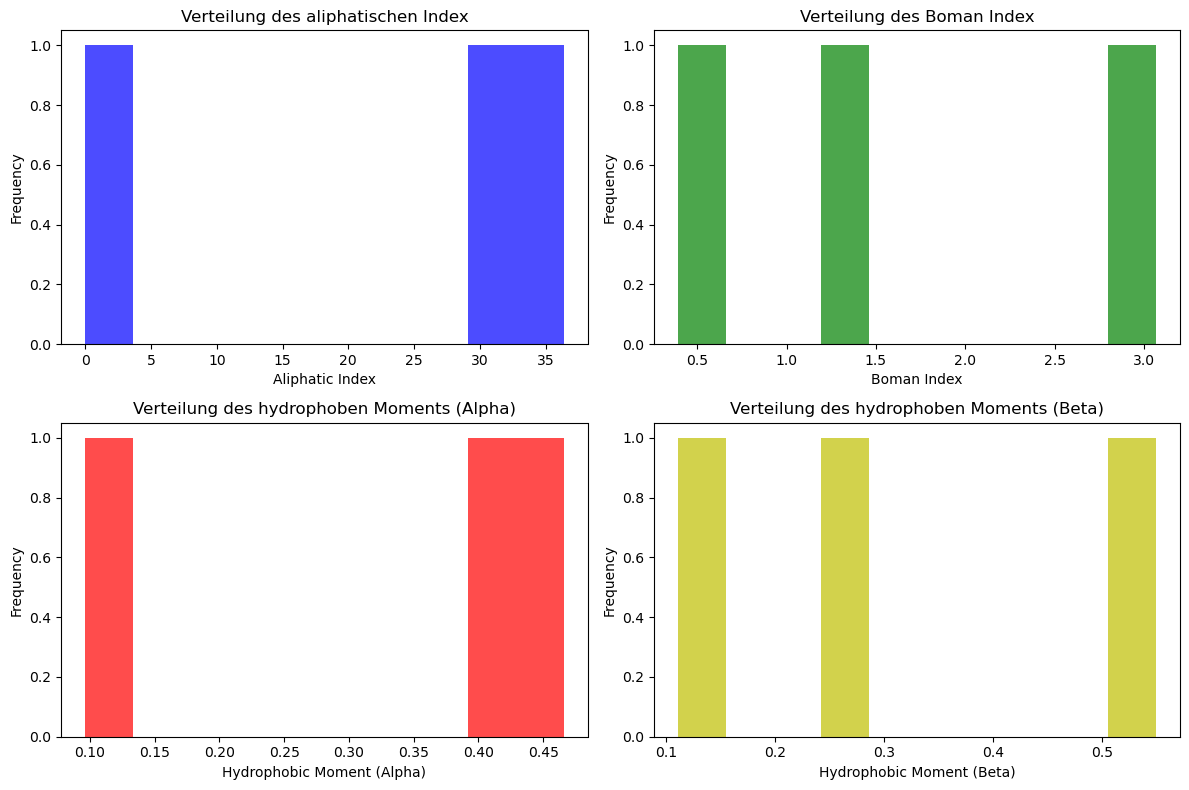

In [13]:
# Plotten der Ergebnisse für die visuellen Überprüfungen
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.hist(aliphatic_indices, bins=10, color='b', alpha=0.7)
plt.xlabel('Aliphatic Index')
plt.ylabel('Frequency')
plt.title('Verteilung des aliphatischen Index')

plt.subplot(2, 2, 2)
plt.hist(boman_indices, bins=10, color='g', alpha=0.7)
plt.xlabel('Boman Index')
plt.ylabel('Frequency')
plt.title('Verteilung des Boman Index')

plt.subplot(2, 2, 3)
plt.hist(hydrophobic_moments_alpha, bins=10, color='r', alpha=0.7)
plt.xlabel('Hydrophobic Moment (Alpha)')
plt.ylabel('Frequency')
plt.title('Verteilung des hydrophoben Moments (Alpha)')

plt.subplot(2, 2, 4)
plt.hist(hydrophobic_moments_beta, bins=10, color='y', alpha=0.7)
plt.xlabel('Hydrophobic Moment (Beta)')
plt.ylabel('Frequency')
plt.title('Verteilung des hydrophoben Moments (Beta)')

plt.tight_layout()
plt.show()

### Verteilung des aliphatischen Index
Der aliphatische Index sollte im Allgemeinen einen positiven Wert haben, der den relativen Gehalt an aliphatischen Aminosäuren beschreibt. In unserem Diagramm sehen wir, dass die Werte in einem vernünftigen Bereich zwischen 0 und 35 liegen.

### Verteilung des Boman-Index
Der Boman-Index gibt die Bindungsfähigkeit an. Werte zwischen 0,5 und 3,0 sind für die ausgewählten Peptidsequenzen plausibel und weisen auf eine unterschiedliche Bindungsfähigkeit hin.

### Verteilung des hydrophoben Moments (Alpha und Beta)
Der hydrophobe Moment beschreibt die amphipathische Natur der Struktur. Die hier berechneten Werte (zwischen 0,1 und 0,5) deuten darauf hin, dass die Sequenzen sowohl hydrophile als auch hydrophobe Bereiche besitzen, was typisch für viele Peptide ist.


In [15]:
# Beispiel für Autokorrelation und Autokovarianz
table = peptides.tables.HYDROPHOBICITY["KyteDoolittle"]
autocorrelation = sequence_Peptide_obj.auto_correlation(table=table)
autocovariance = sequence_Peptide_obj.auto_covariance(table=table)
print("Autokorrelation:", autocorrelation)
print("Autokovarianz:", autocovariance)


Autokorrelation: 0.16777176543287517
Autokovarianz: 0.0687726967047747


In [16]:
# Beispiel für Mass Shift und Mass-to-Charge Ratio
mass_shift = sequence_Peptide_obj.mass_shift(aa_shift="silac_13c")
mz = sequence_Peptide_obj.mz()
print("Mass Shift:", mass_shift)
print("Mass-to-Charge Ratio:", mz)


Mass Shift: 12.040258
Mass-to-Charge Ratio: 549.296151


In [17]:
exclude_keys = {f'BLOSUM{i}' for i in range(1, 11)} | {'PRIN1', 'PRIN2', 'PRIN3', 'AF5'}
qsar_descriptors = {k: v for k, v in sequence_Peptide_obj.descriptors().items() if k not in exclude_keys}
print("QSAR Deskriptoren:", qsar_descriptors)


QSAR Deskriptoren: {'AF1': 0.329001655, 'AF2': 1.2673572689999997, 'AF3': 0.4461927000000001, 'AF4': 0.4723273700000001, 'PP1': -0.269, 'PP2': -0.256, 'PP3': 0.28500000000000003, 'F1': -0.4199, 'F2': -1.3142, 'F3': -0.3393, 'F4': 0.11520000000000001, 'F5': 1.2335999999999998, 'F6': -0.04019999999999999, 'KF1': 1.324, 'KF2': -0.192, 'KF3': -0.03099999999999996, 'KF4': 0.04900000000000002, 'KF5': 0.02200000000000002, 'KF6': -0.157, 'KF7': 0.561, 'KF8': -0.538, 'KF9': -0.051000000000000004, 'KF10': 0.238, 'MSWHIM1': -0.23900000000000002, 'MSWHIM2': 0.441, 'MSWHIM3': -0.29500000000000004, 'E1': 0.13970000000000002, 'E2': 0.16360000000000002, 'E3': 0.22039999999999998, 'E4': -0.15680000000000002, 'E5': 0.0655, 'PD1': -0.6699999999999999, 'PD2': 0.018000000000000016, 'ProtFP1': -3.112, 'ProtFP2': -1.1660000000000004, 'ProtFP3': 2.633, 'ProtFP4': 0.5189999999999999, 'ProtFP5': -0.9160000000000001, 'ProtFP6': -0.8310000000000001, 'ProtFP7': 0.193, 'ProtFP8': 0.11699999999999999, 'SV1': 0.18080